In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Utils functions

In [148]:
def expectedValue(xPx):
  return np.sum([xPx[i][0] * xPx[i][1] for i in range(len(xPx))])

In [149]:
def variance(xPx, expValue=True):
  E = expectedValue(xPx)
  if expValue:
    return {
      "variance": np.sum([xPx[i][1] * np.power(xPx[i][0] - E, 2) for i in range(len(xPx))]),
      "expectedValue": E
    }
  return np.sum([xPx[i][1] * np.power(xPx[i][0] - E, 2) for i in range(len(xPx))])

## Exercício 1

In [150]:
def sampleEx1(N, pC):
  values = []
  valuesConvergence = []
  valueConvergence = 0
  for i in range(1,N+1):
    value = 0
    for j in range(3):
      r = np.random.random()
      if r < pC: value += 1
      else: value -= 1
    values.append(value)
    valueConvergence += value
    valuesConvergence.append(valueConvergence / i)
    # print(value, valueConvergence)
  print("Media: {}".format(np.mean(values)))
  print('Variancia: {}'.format(np.var(values)))
  return {
    "values": values,
    "meanExp": np.mean(values),
    "varExp": np.var(values),
    "valuesConvergence": valuesConvergence
  }

In [151]:
def plotGraphs(N, nBins, sample, teorical={}):
  meanExp = sample.get('meanExp')
  varExp = sample.get('varExp')
  if isinstance(teorical, dict) and teorical != {}:
    meanExp = teorical.get('expectedValue')
    varExp = teorical.get('variance')

  sampleValues = sample.get('values')
  fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(15,6))
  hist = ax[0].hist(sampleValues, nBins, density=True, edgecolor='black')
  topHist = np.max(hist[0]) + .1
  ax[0].vlines(meanExp-varExp, 0, topHist,  colors='m', linestyles='dotted', label='Variancia')
  ax[0].vlines(meanExp+varExp, 0, topHist,  colors='m', linestyles='dotted', label='_')
  ax[0].vlines(meanExp, 0, topHist, colors='r', linestyles='dashed', label='Média')
  ax[0].legend(frameon=True)
  ax[0].set_title('Distribuiçao de Probabilidade')
  ax[0].set_ylabel(r'Probabilidade de $w_i$')
  ax[0].set_xlabel(r'Valores Obtidos $w_i$')

  ax[1].plot(np.linspace(1,N,N), sample.get('valuesConvergence'))
  ax[1].hlines(meanExp, 0, N, colors='r', linestyles='dashed', label='Média')
  ax[1].hlines(meanExp+varExp, 0, N, colors='m', linestyles='dotted', label='Variancia')
  ax[1].hlines(meanExp-varExp, 0, N, colors='m', linestyles='dotted', label='_')
  ax[1].legend(frameon=True)
  ax[1].set_title('Convergencia Valor Esperado')
  ax[1].set_xlabel('N amostras')
  ax[1].set_ylabel(r'Valores Obtidos $w_i$')

  plt.show()

### (c)

Media: -0.0172
Variancia: 2.96290416
Media Teorica: 0.0
Variancia Teorica: 3.0


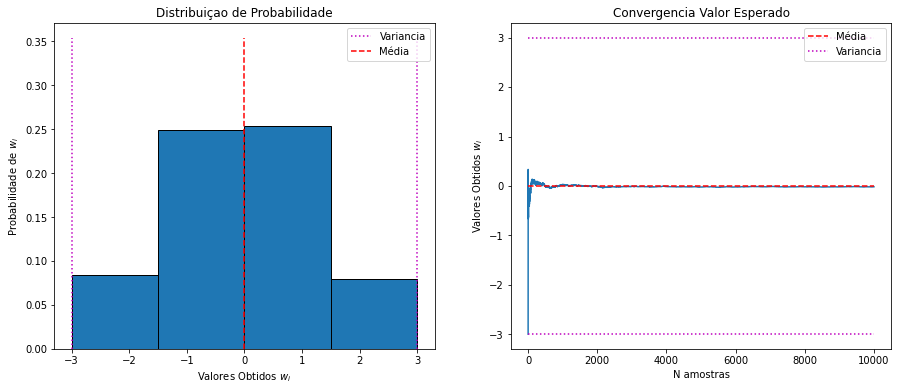

In [152]:
N = 10000
pC = 1/2
nBins = 4
sample = sampleEx1(N, pC)
xPx = [
  (3, np.power(pC, 3)), 
  (1, 3*np.power(pC, 3)),
  (-1, 3*np.power(pC, 3)),
  (-3, np.power(pC, 3))
]
V = variance(xPx)
print('Media Teorica: {}'.format(V.get('expectedValue')))
print('Variancia Teorica: {}'.format(V.get('variance')))
plotGraphs(N, nBins, sample, teorical=V)

### (d)

Media: 1.0478
Variancia: 2.6453151600000004
Media Teorica: 0.9999999999999996
Variancia Teorica: 2.6666666666666665


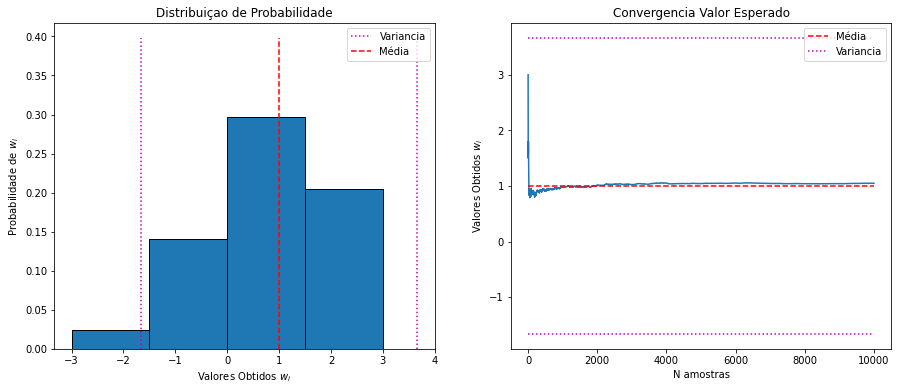

In [153]:
N = 10000
pC = 2/3
nBins = 4
sample = sampleEx1(N, pC)

xPx = [
  (3, np.power(pC, 3)), 
  (1, 3*pC*pC*(1-pC)),
  (-1, 3*pC*(1-pC)*(1-pC)),
  (-3, np.power((1-pC), 3))
]

V = variance(xPx)
print('Media Teorica: {}'.format(V.get('expectedValue')))
print('Variancia Teorica: {}'.format(V.get('variance')))
plotGraphs(N, nBins, sample, teorical=V)

## Exercício 2

### (a)

In [154]:
def sampleEx2_a(N):
  values = []
  valuesConvergence = []
  valueConvergence = 0
  for i in range(1,N+1):
    cardSuit = [
      'S','S','S','S','S','S','S','S','S','S','S','S', 
      'D','D','D','D','D','D','D','D','D','D','D','D',
      'C','C','C','C','C','C','C','C','C','C','C','C',
      'H','H','H','H','H','H','H','H','H','H','H','H'
    ]
    value = 0
    for j in range(3):
      r = np.random.randint(0, len(cardSuit))
      chosenSuit = cardSuit.pop(r)
      if chosenSuit == 'S': value += 1
    values.append(value)
    valueConvergence += value
    valuesConvergence.append(valueConvergence / i)
    # print(value, valueConvergence)
  print("Media: {}".format(np.mean(values)))
  print('Variancia: {}'.format(np.var(values)))
  return {
    "values": values,
    "meanExp": np.mean(values),
    "varExp": np.var(values),
    "valuesConvergence": valuesConvergence
  }

Media teorica: 0.75
Variancia teorica: 0.5404411764705882
Media: 0.751
Variancia: 0.522599


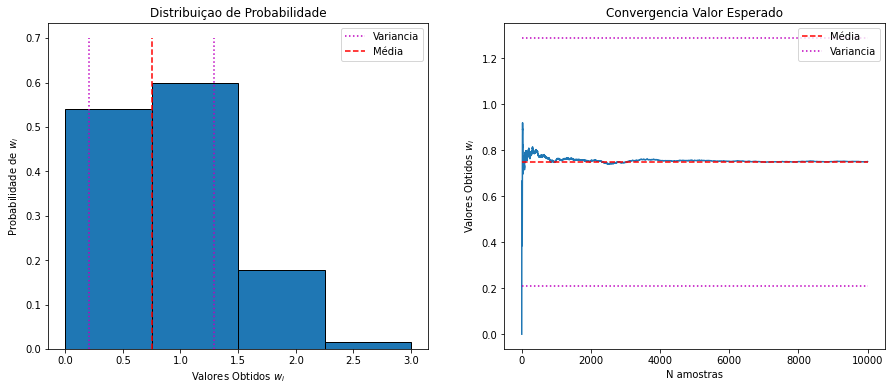

In [159]:
N = 10000
nBins = 4
xPx = [
  (3, (13*12*11)/(52*51*50)),
  (2, 3*(13*12*39)/(52*51*50)),
  (1, 3*(13*39*38)/(52*51*50)),
  (0, (39*38*37)/(52*51*50))
]
E = expectedValue(xPx)
print(f'Media teorica: {E}')
V = variance(xPx)
print('Variancia teorica: {}'.format(V.get('variance')))

sample = sampleEx2_a(N)
plotGraphs(N, nBins, sample, teorical=V)

### (c)

In [160]:
def sampleEx2_c(N):
  values = []
  valuesConvergence = []
  valueConvergence = 0
  for i in range(1,N+1):
    cardSuit = [
      'S','S','S','S','S','S','S','S','S','S','S','S', 
      'D','D','D','D','D','D','D','D','D','D','D','D',
      'C','C','C','C','C','C','C','C','C','C','C','C',
      'H','H','H','H','H','H','H','H','H','H','H','H'
    ]
    value = 0
    for j in range(3):
      r = np.random.randint(0, len(cardSuit))
      chosenSuit = cardSuit.pop(r)
      if chosenSuit == 'S' or chosenSuit == 'D': value += 1
    values.append(value)
    valueConvergence += value
    valuesConvergence.append(valueConvergence / i)
    # print(value, valueConvergence)
  print("Media: {}".format(np.mean(values)))
  print('Variancia: {}'.format(np.var(values)))
  return {
    "values": values,
    "meanExp": np.mean(values),
    "varExp": np.var(values),
    "valuesConvergence": valuesConvergence
  }

Media teorica: 3.411764705882353
Variancia teorica: 11.809485039690614
Media: 1.5056
Variancia: 0.71336864


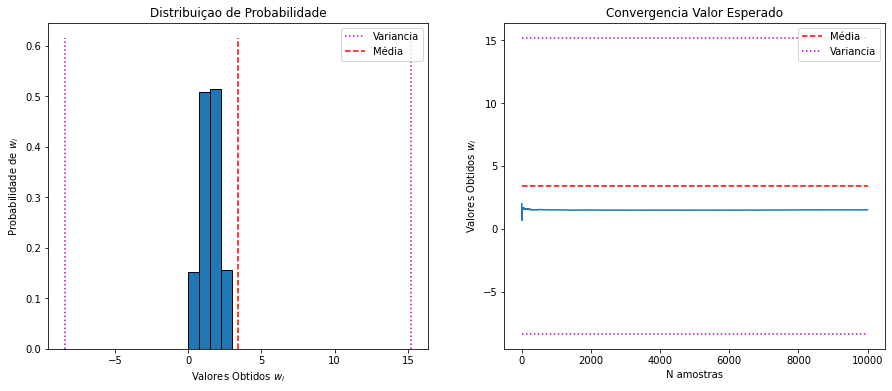

In [161]:
N = 10000
nBins = 4
xPx = [
  (3, (26*25*24)/(52*51*50)),
  (2, 3*2*(26*26*25)/(52*51*50)),
  (1, 3*4*(26*26*25)/(52*51*50)),
  (0, (26*25*24)/(52*51*50))
]
E = expectedValue(xPx)
print(f'Media teorica: {E}')
V = variance(xPx)
print('Variancia teorica: {}'.format(V.get('variance')))

sample = sampleEx2_c(N)
plotGraphs(N, nBins, sample, teorical=V)

## Exercício 3